##Importing the libraries that we need


In [ ]:
# TensorFlow and tf.keras
import torch 
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

1.9.0+cu102


## Import Pictures


In [ ]:
# importing pictures
import glob
bad_cheese = glob.glob('/data/bad_cheese/*')
good_cheese = glob.glob('/data/good_cheese/*')
print(bad_cheese)
print(good_cheese)

['/content/cheese/bad_cheese/bad_cheddat.jpeg', '/content/cheese/bad_cheese/0038.jpg', '/content/cheese/bad_cheese/0042.jpg', '/content/cheese/bad_cheese/0043.jpg', '/content/cheese/bad_cheese/bad_cheese_wheel.jpeg', '/content/cheese/bad_cheese/0039.jpg', '/content/cheese/bad_cheese/0041.jpg', '/content/cheese/bad_cheese/bad_cheddar_2.jpeg', '/content/cheese/bad_cheese/0044.jpg', '/content/cheese/bad_cheese/0040.jpeg']
['/content/cheese/good_cheese/GettyImages-596053834-c-9c9505d.jpg', '/content/cheese/good_cheese/0021.jpeg', '/content/cheese/good_cheese/64252513356-06.jpg', '/content/cheese/good_cheese/images.jpg', '/content/cheese/good_cheese/stilton-cheese.jpg', '/content/cheese/good_cheese/mold-moldy-blue-cheese-732x549-thumbnail.jpg', '/content/cheese/good_cheese/0017.jpeg', '/content/cheese/good_cheese/0018.jpg', '/content/cheese/good_cheese/0014.jpeg', '/content/cheese/good_cheese/0013.jpeg']


## Data Preprocessing


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

IMG_WIDTH=300
IMG_HEIGHT=300
IMG_DIM = (IMG_WIDTH, IMG_HEIGHT)

def process_img(img):
    img = conv_img(img)
    img = scale_img(img)
    return img

def conv_img(img):
    return img_to_array(load_img(img, target_size=IMG_DIM))

def scale_img(img):
    img_scaled = img.astype("float32")
    img_scaled /= 255 

    return img_scaled

In [ ]:
# group all data into input and label set 
# split into train_x, train_y and test_x, test_y 
bad_cheese_imgs = [conv_img(img) for img in bad_cheese] 
# print(bad_cheese_imgs)
good_cheese_imgs = [conv_img(img) for img in good_cheese] 

#### Labeling


In [ ]:
bad_label = []
for c in bad_cheese_imgs:
  bad_label.append(0)

good_label = []
for c in good_cheese_imgs:
  good_label.append(1)

In [ ]:
print(good_cheese_imgs[0]) #input for bad cheese
print(good_label[0]) #output for bad cheese

[[[253. 253. 253.]
  [253. 253. 253.]
  [253. 253. 253.]
  ...
  [253. 253. 253.]
  [253. 253. 253.]
  [253. 253. 253.]]

 [[244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 [[245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]
  ...
  [245. 245. 245.]
  [245. 245. 245.]
  [245. 245. 245.]]

 ...

 [[240. 240. 238.]
  [240. 240. 238.]
  [240. 240. 238.]
  ...
  [245. 245. 243.]
  [245. 245. 243.]
  [245. 245. 243.]]

 [[240. 240. 238.]
  [240. 240. 238.]
  [240. 240. 238.]
  ...
  [245. 245. 243.]
  [245. 245. 243.]
  [245. 245. 243.]]

 [[241. 241. 239.]
  [241. 241. 239.]
  [241. 241. 239.]
  ...
  [245. 245. 243.]
  [245. 245. 243.]
  [245. 245. 243.]]]
1


#### Grouping 

In [ ]:
# group the good and bad cheese into one big array 
cheese_imgs = good_cheese_imgs + bad_cheese_imgs
print(len(cheese_imgs))
cheese_labels = good_label + bad_label
print(cheese_labels[0])
print(cheese_labels[10]) # gonna assume > 10 cheese images

20
1
0


#### Shuffle


In [ ]:
# shuffle both array 
from sklearn.utils import shuffle

imgs_shuffled, label_shuffled = shuffle(cheese_imgs, cheese_labels)
print(label_shuffled)

[1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]


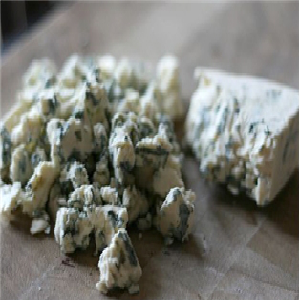

In [ ]:
array_to_img(imgs_shuffled[2]) 

In [ ]:
# normalize
def scale_imgs(X):

    imgs_scaled = X.astype("float32")
    imgs_scaled /= 255 

    return imgs_scaled

In [ ]:
cheese_array = np.array(imgs_shuffled)
cheese_scaled = scale_imgs(cheese_array)
label_array = np.array(label_shuffled)

In [ ]:
print(cheese_scaled[2])
print(label_array[2])

[[[0.41568628 0.41568628 0.40784314]
  [0.22745098 0.22745098 0.21960784]
  [0.23921569 0.23921569 0.23137255]
  ...
  [0.59607846 0.5803922  0.5764706 ]
  [0.5921569  0.5882353  0.5803922 ]
  [1.         1.         0.99215686]]

 [[0.22352941 0.22745098 0.20784314]
  [0.07450981 0.07450981 0.06666667]
  [0.08627451 0.08627451 0.07843138]
  ...
  [0.53333336 0.5176471  0.5137255 ]
  [0.5372549  0.53333336 0.5254902 ]
  [1.         1.         0.99215686]]

 [[0.22352941 0.22745098 0.20784314]
  [0.07450981 0.07450981 0.06666667]
  [0.08627451 0.08627451 0.07843138]
  ...
  [0.53333336 0.5176471  0.5137255 ]
  [0.5372549  0.53333336 0.5254902 ]
  [1.         1.         0.99215686]]

 ...

 [[0.5411765  0.5254902  0.52156866]
  [0.5019608  0.4862745  0.48235294]
  [0.49019608 0.4862745  0.47843137]
  ...
  [0.42352942 0.40784314 0.40392157]
  [0.44313726 0.4392157  0.43137255]
  [1.         1.         1.        ]]

 [[0.5411765  0.5254902  0.52156866]
  [0.5019608  0.4862745  0.48235294]


#### Split data


In [ ]:
# split the data into 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cheese_scaled, label_array, test_size=0.20, random_state=42)


Build Model


In [ ]:
# this is the model with 3 layers 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_WIDTH,IMG_HEIGHT,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 936ms/step - loss: 2.0500 - accuracy: 0.1250
Epoch 2/20
1/1 [==============================] - 0s 164ms/step - loss: 31.3821 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 164ms/step - loss: 310.1772 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 161ms/step - loss: 254.4511 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 169ms/step - loss: 41.6826 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 159ms/step - loss: 199.1817 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 154ms/step - loss: 300.2557 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 160ms/step - loss: 294.8982 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 154ms/step - loss: 212.2049 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 157ms/step - loss: 70.8853 - accuracy: 0.5000
Epoc

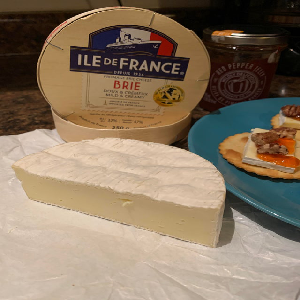

In [ ]:
array_to_img(X_test[0])

In [ ]:
print(y_test[0])

1


## Making Prediction


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')